# 这是对于100跳仿真的不断迭代，只有靠谱的才放进来。并指明路径。

## 31.25ms 的时间同步得到结果
31.25 毫秒是 2 的-5次方秒

pdelay 按照的是25ns，5m网线
 


Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

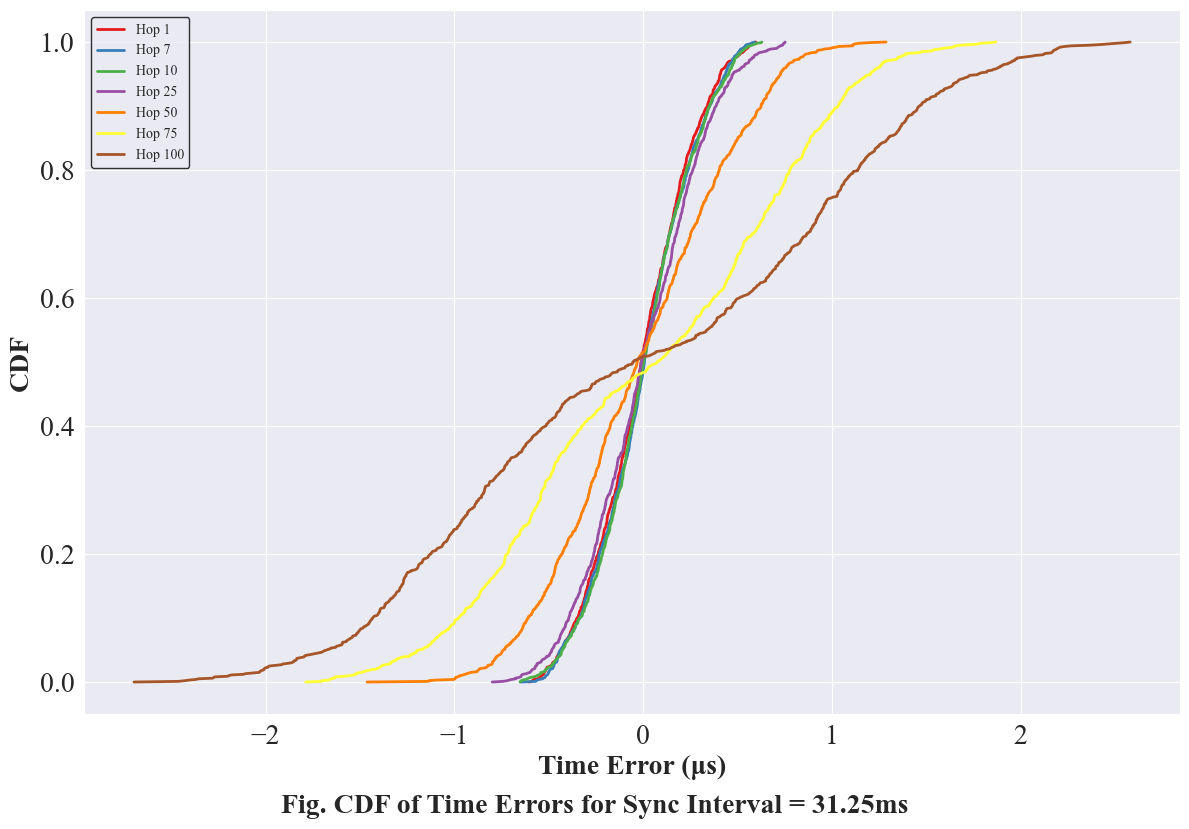

In [8]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_3125ms.png", dpi=600)
# 在图形最下方添加标题
plt.suptitle('Fig. CDF of Time Errors for Sync Interval = 31.25ms', 
             y=0,  # 控制标题位置，0是底部，1是顶部
             fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置字体大小
plt.show()
plt.close()


---

## 62.5ms
62.5ms是 2 的-4次方秒


Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

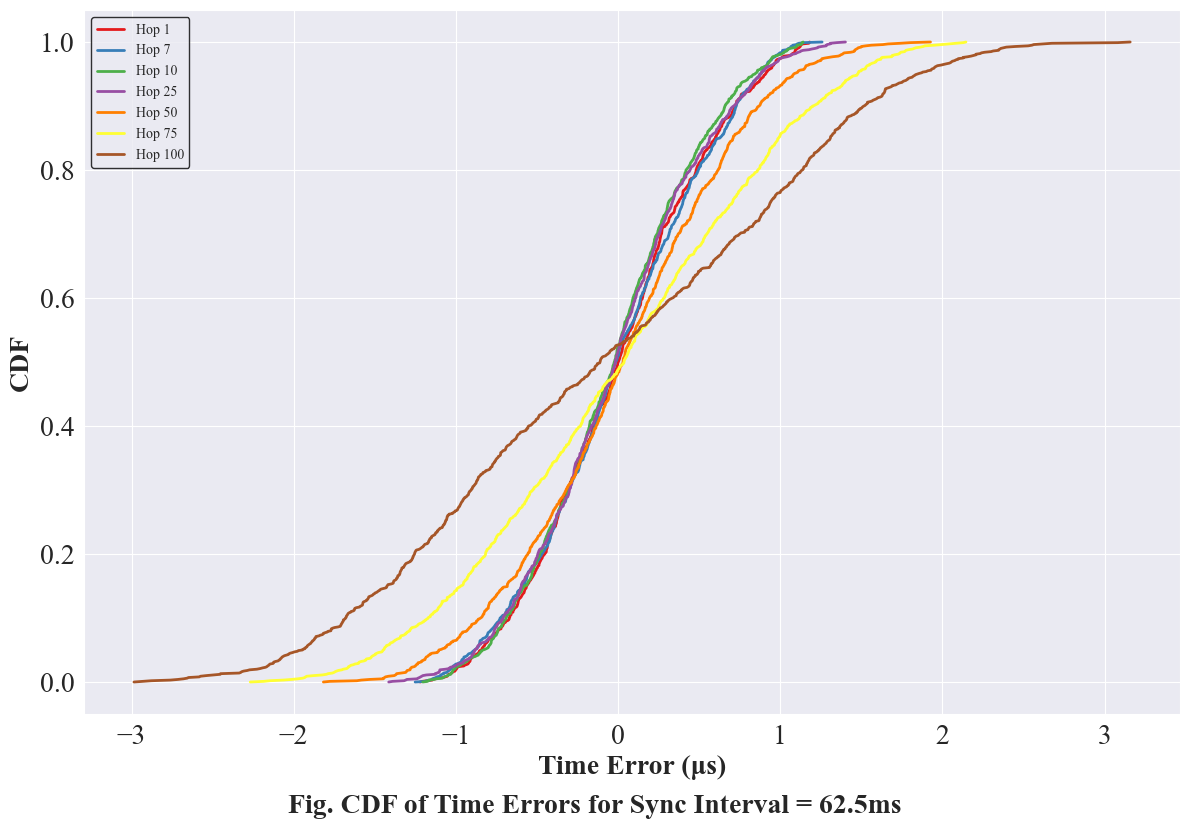

In [9]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 62.5e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_625ms.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_625ms.png", dpi=600)
# 在图形最下方添加标题
plt.suptitle('Fig. CDF of Time Errors for Sync Interval = 62.5ms', 
             y=0,  # 控制标题位置，0是底部，1是顶部
             fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置字体大小
plt.show()
plt.close()


---

## 125ms
125ms 是2的-3次方，是标准中提到的时间同步周期

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

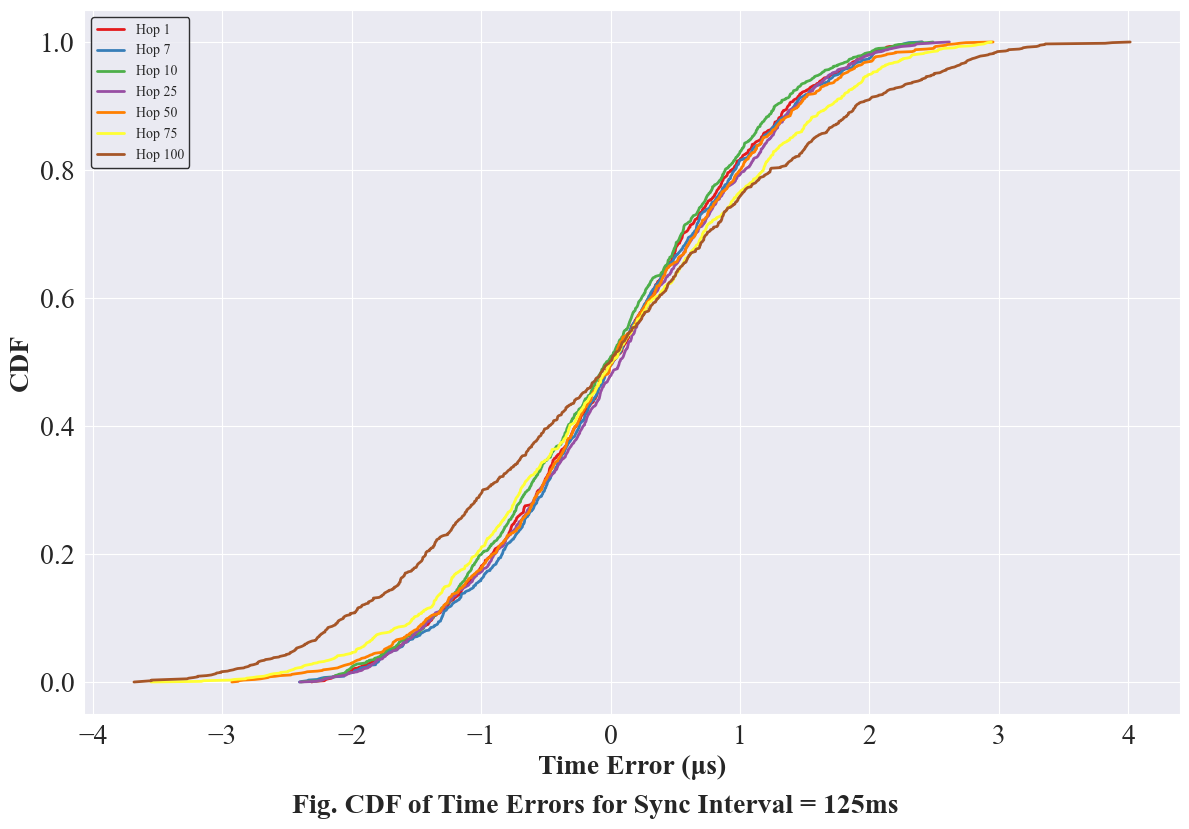

In [10]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 125.0e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_125ms.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_125ms.png", dpi=600)
# 在图形最下方添加标题
plt.suptitle('Fig. CDF of Time Errors for Sync Interval = 125ms', 
             y=0,  # 控制标题位置，0是底部，1是顶部
             fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置字体大小
plt.show()
plt.close()


# 改成pdf


Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

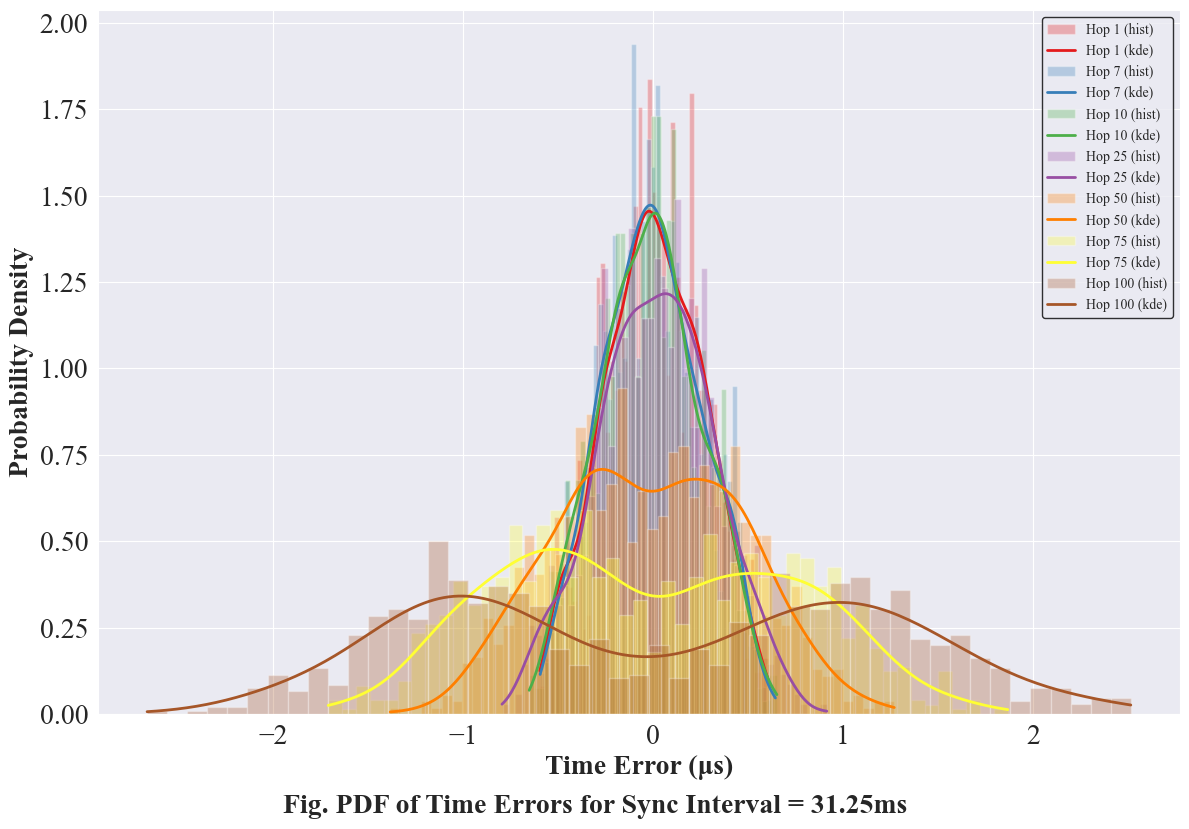

In [11]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/17 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# 创建概率密度分布图而非CDF图
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # 提取该跳数的数据并转换为微秒
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6
    
    # 使用直方图和核密度估计生成PDF
    bins = np.linspace(min(errors_us), max(errors_us), 50)
    plt.hist(errors_us, bins=bins, density=True, alpha=0.3, 
             color=colors[str(i+1)], label=f'Hop {hop} (hist)')
    
    # 添加核密度估计曲线使图形更平滑
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(errors_us)
    x_vals = np.linspace(min(errors_us), max(errors_us), 200)
    plt.plot(x_vals, kde(x_vals), color=colors[str(i+1)], 
             linewidth=2, label=f'Hop {hop} (kde)')

# 配置图形外观
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Probability Density', fontname='Times New Roman', fontsize=20, fontweight='bold')

# 通过分组合并相关的图例条目，使图例更整洁
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black',
           prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_pdf_3125ms.png", dpi=600)
# 在图形最下方添加标题
plt.suptitle('Fig. PDF of Time Errors for Sync Interval = 31.25ms', 
             y=0,  # 控制标题位置，0是底部，1是顶部
             fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置字体大小
plt.show()
plt.close()


## 只画100跳的pdf和直方分布图。

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

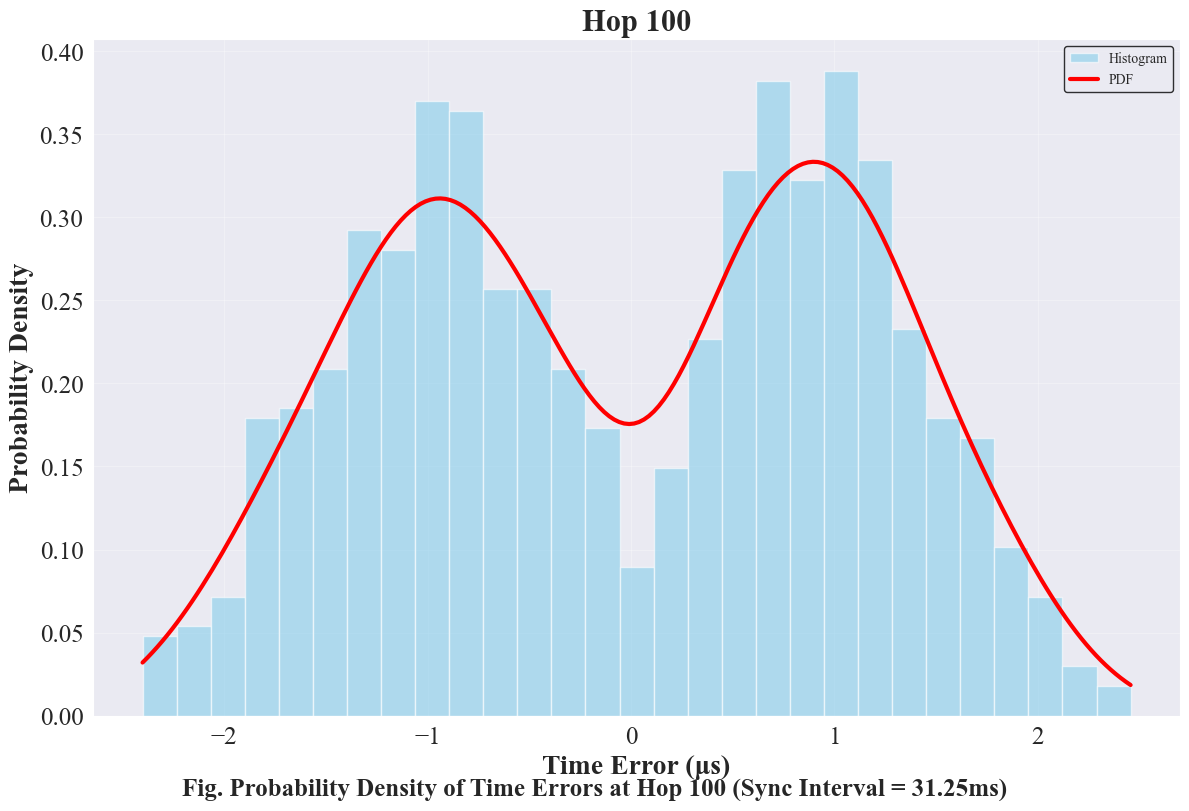

In [12]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from scipy.stats import gaussian_kde

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)  # 确保输出图像目录存在

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms.csv", index=False)

# 只针对100跳创建概率密度分布和直方图
plt.figure(figsize=(12, 8))

# 提取100跳的数据并转换为微秒
hop = 100
errors = np.array(all_data[hop])
errors_us = errors * 1e6

# 创建直方图
bins = np.linspace(min(errors_us), max(errors_us), 30)  # 30个柱子
hist_values, bin_edges, _ = plt.hist(errors_us, bins=bins, density=True, alpha=0.6, 
         color='skyblue', label='Histogram')

# 添加核密度估计曲线
kde = gaussian_kde(errors_us)
x_vals = np.linspace(min(errors_us), max(errors_us), 200)
plt.plot(x_vals, kde(x_vals), color='red', linewidth=3, label='PDF')

# 配置图形外观
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Probability Density', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.title(f'Hop {hop}', fontname='Times New Roman', fontsize=22, fontweight='bold')

plt.legend(fontsize=18, frameon=True, shadow=False, edgecolor='black',
           prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=18)
plt.yticks(fontname='Times New Roman', fontsize=18)

plt.tight_layout()
plt.savefig("output_image/time_error_pdf_hop100_3125ms.png", dpi=600)

# 在图形最下方添加标题
plt.suptitle('Fig. Probability Density of Time Errors at Hop 100 (Sync Interval = 31.25ms)', 
             y=0.02,  # 控制标题位置，0是底部，1是顶部
             fontsize=18, fontweight='bold', fontname='Times New Roman')

plt.show()
plt.close()

这样看这个好像有问题？

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

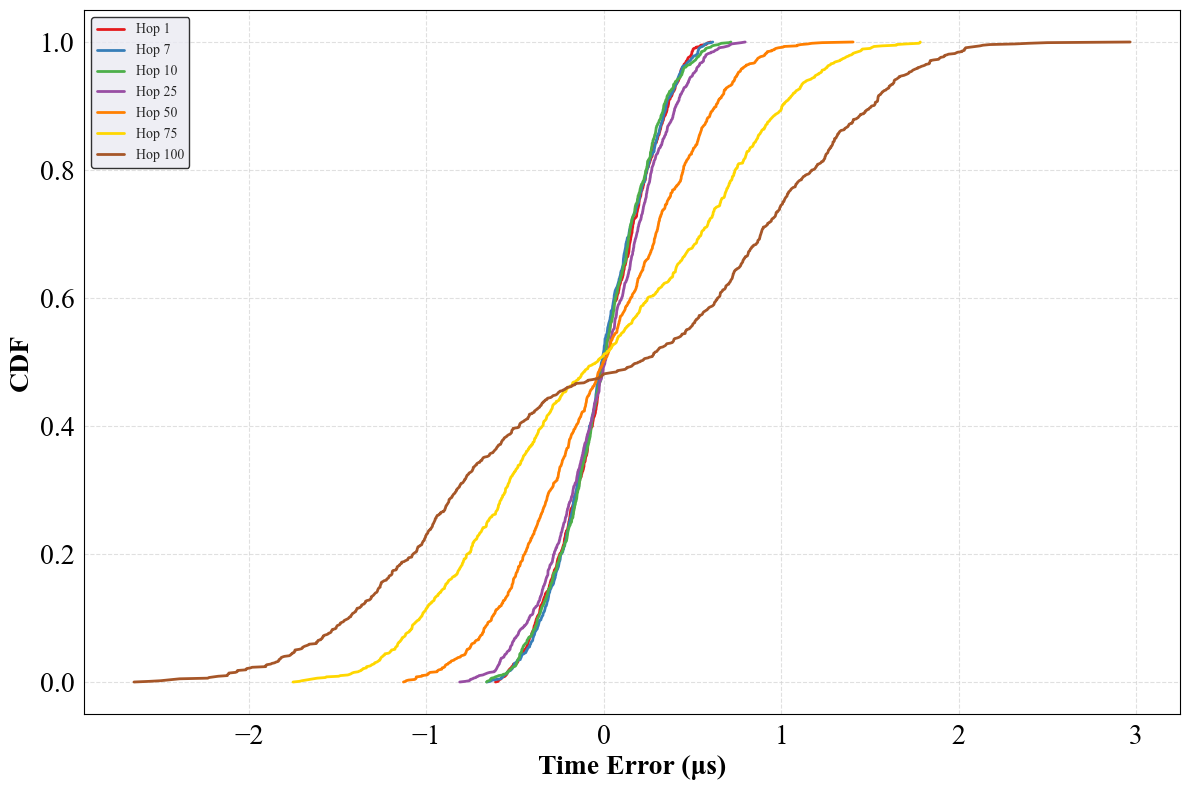

In [13]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
DRIFT_RATE_CHANGE = 1e-6  # 漂移率变化范围：±1 ppm/s
PROPAGATION_DELAY = 25e-9  # 62 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # 初始漂移率
    gm_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    
    # 漂移率变化率 (ppm/s)
    gm_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    node_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    
    # 计算漂移率变化量 (变化率 * 同步间隔)
    gm_drift_change = gm_drift_change_rate * sync_interval  # 单位：秒
    node_drift_change = node_drift_change_rate * sync_interval
    
    # 更新后的漂移率
    gm_drift = gm_drift_initial + gm_drift_change
    node_drift = node_drift_initial + node_drift_change
    
    # 基本误差计算(使用更新后的漂移率)
    basic_error = (node_drift - gm_drift) * sync_interval
    
    # 添加 NR_ERROR 影响 (±0.1 ppm)
    nr_error_contribution = np.random.uniform(-NR_ERROR, NR_ERROR) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error (now including nr_error_contribution)
    total_error = basic_error + accumulated_error + nr_error_contribution

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms_v2.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#003f5c',  # 深蓝色
    '2': '#58508d',  # 紫蓝色
    '3': '#bc5090',  # 紫红色
    '4': '#ff6361',  # 珊瑚红
    '5': '#ffa600',  # 橙黄色
    '6': '#2c9c4c',  # 翠绿色
    '7': '#5e6472'  # 石板灰
}

# Create plot of time error distributions with modified styling
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')  # 灰色虚线网格

# 设置坐标轴为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20, color='black')
plt.yticks(fontname='Times New Roman', fontsize=20, color='black')

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_3125ms_v2.png", dpi=600, facecolor='white')
plt.show()

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

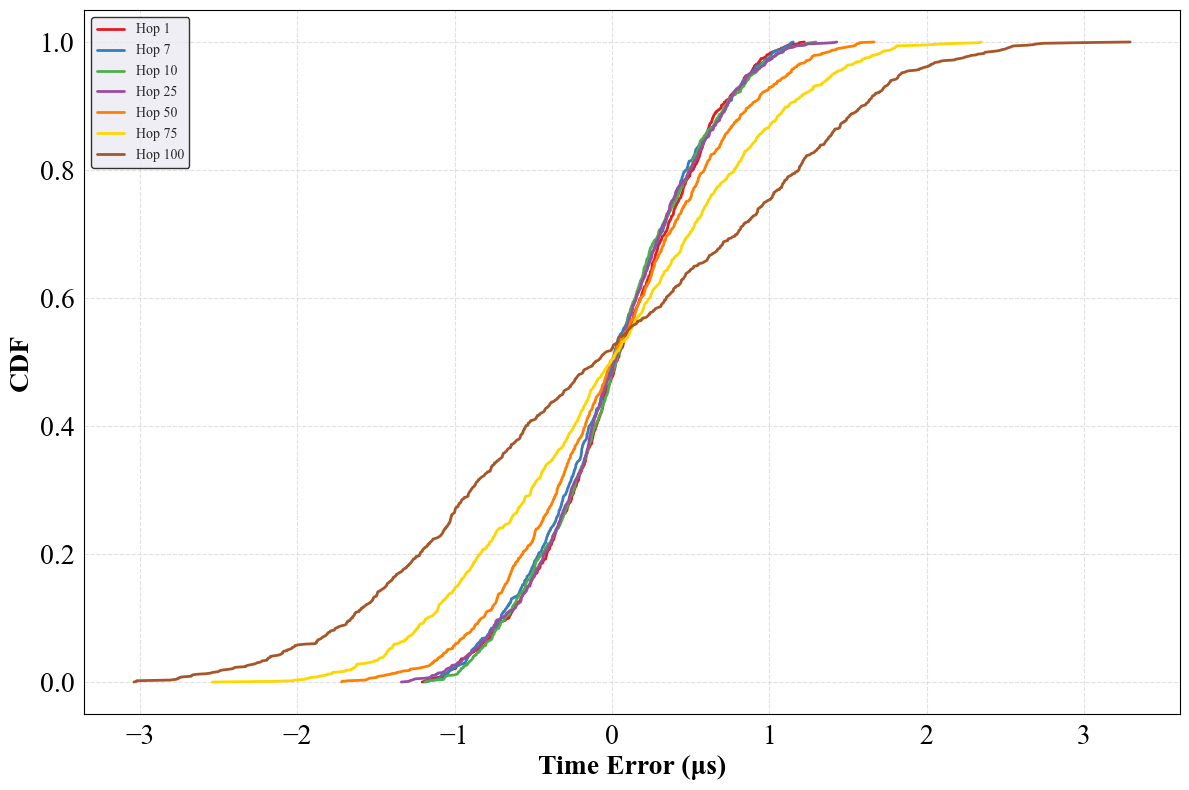

In [14]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
DRIFT_RATE_CHANGE = 1e-6  # 漂移率变化范围：±1 ppm/s
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 62.5e-3  # 62.5 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # 初始漂移率
    gm_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    
    # 漂移率变化率 (ppm/s)
    gm_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    node_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    
    # 计算漂移率变化量 (变化率 * 同步间隔)
    gm_drift_change = gm_drift_change_rate * sync_interval  # 单位：秒
    node_drift_change = node_drift_change_rate * sync_interval
    
    # 更新后的漂移率
    gm_drift = gm_drift_initial + gm_drift_change
    node_drift = node_drift_initial + node_drift_change
    
    # 基本误差计算(使用更新后的漂移率)
    basic_error = (node_drift - gm_drift) * sync_interval
    
    # 添加 NR_ERROR 影响 (±0.1 ppm)
    nr_error_contribution = np.random.uniform(-NR_ERROR, NR_ERROR) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error (now including nr_error_contribution)
    total_error = basic_error + accumulated_error + nr_error_contribution

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_625ms_v2.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFD700',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions with modified styling
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')  # 灰色虚线网格

# 设置坐标轴为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20, color='black')
plt.yticks(fontname='Times New Roman', fontsize=20, color='black')

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_625ms_v2.png", dpi=600, facecolor='white')
plt.show()

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

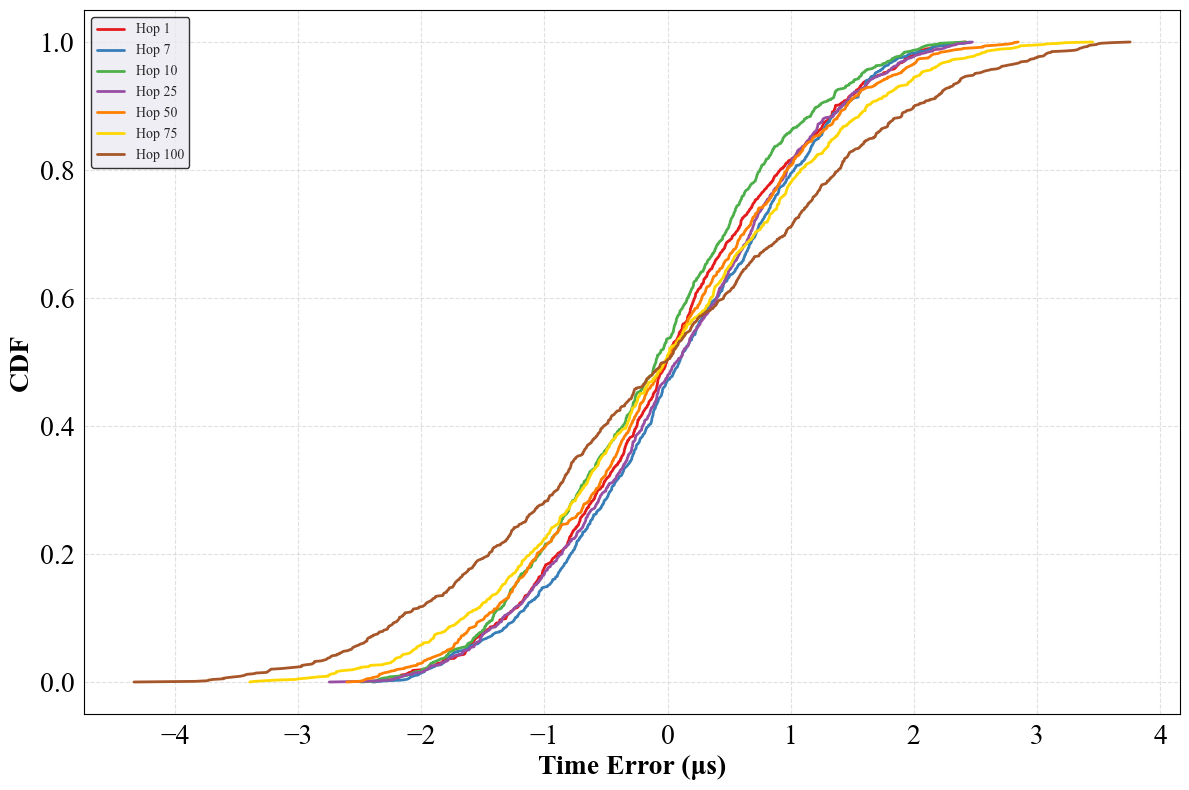

In [15]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
DRIFT_RATE_CHANGE = 1e-6  # 漂移率变化范围：±1 ppm/s
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 125e-3  # 125 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # 初始漂移率
    gm_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    
    # 漂移率变化率 (ppm/s)
    gm_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    node_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    
    # 计算漂移率变化量 (变化率 * 同步间隔)
    gm_drift_change = gm_drift_change_rate * sync_interval  # 单位：秒
    node_drift_change = node_drift_change_rate * sync_interval
    
    # 更新后的漂移率
    gm_drift = gm_drift_initial + gm_drift_change
    node_drift = node_drift_initial + node_drift_change
    
    # 基本误差计算(使用更新后的漂移率)
    basic_error = (node_drift - gm_drift) * sync_interval
    
    # 添加 NR_ERROR 影响 (±0.1 ppm)
    nr_error_contribution = np.random.uniform(-NR_ERROR, NR_ERROR) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error (now including nr_error_contribution)
    total_error = basic_error + accumulated_error + nr_error_contribution

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_125ms_v2.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFD700',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions with modified styling
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')  # 灰色虚线网格

# 设置坐标轴为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20, color='black')
plt.yticks(fontname='Times New Roman', fontsize=20, color='black')

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_125ms_v2.png", dpi=600, facecolor='white')
plt.show()

## 编写Python代码来读取不同时间同步周期的时间误差数据，并找出特定跳数数据的绝对值最大值，然后以表格形式打印。


In [17]:
import pandas as pd
import numpy as np
import os

# 文件路径
file_paths = {
    '31.25ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_3125ms_v2.csv",
    '62.5ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_625ms_v2.csv",
    '125ms': r"D:\06_engineering\03_analysis\pj_gptp_simulation\DATA_100hops\output_data\te_data_125ms_v2.csv"
}

# 要查询的跳数
hops_to_check = [1, 7, 10, 25, 50, 75, 100]

# 创建结果存储字典
results = {}

# 处理每个文件
for period, file_path in file_paths.items():
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        continue
    
    try:
        # 读取CSV文件，确保科学计数法正确解析
        df = pd.read_csv(file_path, float_precision='high')
        
        # 存储当前周期的结果
        hop_results = {}
        
        # 对每个需要的跳数，找出绝对值最大值并转换为微秒
        for hop in hops_to_check:
            hop_col = str(hop)  # 列名应该是字符串形式的跳数
            
            if hop_col in df.columns:
                # 计算绝对值最大值，并从秒转换为微秒（乘以10^6）
                max_abs_value = df[hop_col].abs().max() * 1_000_000
                hop_results[hop] = max_abs_value
            else:
                hop_results[hop] = "N/A"
                print(f"在{period}周期文件中未找到{hop}跳的数据")
        
        results[period] = hop_results
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {str(e)}")
        results[period] = {hop: "Error" for hop in hops_to_check}

# 创建DataFrame来格式化输出
result_df = pd.DataFrame(results)
result_df.index.name = '跳数'

# 设置显示选项，避免科学计数法，显示完整数字
pd.set_option('display.float_format', '{:.6f}'.format)

# 打印表格
print("\n绝对值最大时间误差数据表 (单位: 微秒)")
print("=" * 60)
print(result_df)
print("=" * 60)


绝对值最大时间误差数据表 (单位: 微秒)
     31.25ms   62.5ms    125ms
跳数                            
1   0.611143 1.223268 2.420831
7   0.659982 1.188944 2.458716
10  0.715463 1.297205 2.489624
25  0.812699 1.429507 2.746461
50  1.404052 1.719228 2.847903
75  1.782555 2.540207 3.451800
100 2.965739 3.295136 4.332786
